# DS 3000 HW 2

Due: Sun Feb 13 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to [gradescope](https://www.gradescope.com/courses/337250).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds3000/admin.html#piazza-discussion-forum)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds3000/office_hours.html)
    - Office Hours will start Jan 26, I"ll send an announcement that day and instructions will be complete on the course website
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds3000/style_guide.html)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](https://course.ccs.neu.edu/ds3000/syllabus.html#academic-integrity-and-conduct)

# Plotting Functions

## Part 1: Plotting Warm Up (18 points)
Plot each of the functions below over 100 evenly spaced points in the domain $[0, 10]$. 

Be sure to use the line specifications given below:

| Name       | Value                       | Color | Line Width     | Style  |
|------------|-----------------------------|-------|----------------|--------|
| sinusoid   | 3 * sin (2/3 x)             | Red   | 4              | dotted |
| polynomial | (x-3) (x - 2) (x-8) / 10    | Blue  | 2              | solid  |
| abs value  | min(abs(x - 3), abs(x - 8)) | Green | 3              | dashed |

- add a legend which specifies the name of each function
- use seaborn's `sns.set()` before plotting to make the graph look nice
- Make sure that the axes are labeled `x` and `f(x)`
- You may find the arithmetic functions needed in numpy (sin, abs, minimum)

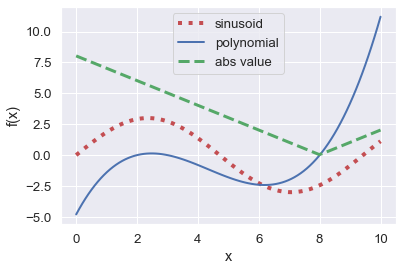

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# setting the axis labels 
sns.set(font_scale=1.2)
plt.xlabel('x')
plt.ylabel('f(x)')

x = np.linspace(0, 10, 100)

# functions
sinusoid_y = 3 * np.sin((2/3)*x)
poly_y = ((x-3)*(x-2)*(x-8)) / 10
abs_y = np.min(np.abs(x-3)) + np.abs(x-8)

# sinusoid plot
sinusoid = plt.plot(x, sinusoid_y,
        color='r', linewidth=4, linestyle=':', label='sinusoid')

# polynomial plot
polynomial = plt.plot(x, poly_y,
        color='b', linewidth=2, linestyle='-', label='polynomial')

# absolute value plot
abs_value = plt.plot(x, abs_y,
        color='g', linewidth=3, linestyle='--', label='abs value')

legend = plt.legend()

# Part 2: Bike Data

## Part 2.1: DataFrame Construction (10 points)
Recreate the following table of bicycle race data as a dataframe (do not write a csv and read it in to accomplish this).  Use the `Bike ID` as the index column and save the resulting dataframe as a csv (you need not submit this csv, but be sure to include the `DataFrame.to_csv()` command in your submission).

| Bike ID | Rider ID | Make      | Color      | Bike Type  | Weight (g) | Time Trial 1 (s) | Time Trial 2 (s) |
|---------|----------|-----------|------------|------------|------------|------------------|------------------|
| 037     | 3        | Bianchi   | Celeste    | Road       | 8200       | 450              | 205              |
| 379     | 1        | Duratec   | \<no paint>| Cyclocross | 9500       | 510              | 222              |
| 398     | 7        | Trek      | Red        | Road       | 9000       | 432              | 211              |
| 37B     | 3        | Trek      | Black      | Mountain   | 13607      | 561              | 301              |
| BRG     | 7        | Canondale | Black      | Mountain   | 15005      | 524              | 299              |

In [2]:
import pandas as pd
import numpy as np

# bike dataframe
df_bike = pd.DataFrame()

# bike dictionary
bike_dict = {'Bike ID': ['037', '379', '398', '37B', 'BRG'],
            'Rider ID': [3, 1, 7, 3, 7],
            'Make': ['Bianchi', 'Duratec', 'Trek', 'Trek', 'Canondale'],
            'Color': ['Celeste', '<no paint>', 'Red', 'Black', 'Black'],
            'Bike Type': ['Road', 'Cyclocross', 'Road', 'Mountain', 'Mountain'],
            'Weight (g)': [8200, 9500, 9000, 13607, 15005],
            'Time Trial 1 (s)': [450, 510, 432, 561, 524],
            'Time Trial 2 (s)': [205, 222, 211, 301, 299]}

# setting the bike dataframe with the bike dictionary
df_bike = pd.DataFrame(bike_dict)
df_bike = df_bike.set_index('Bike ID')

df_bike

,Rider ID,Make,Color,Bike Type,Weight (g),Time Trial 1 (s),Time Trial 2 (s)
Bike ID,,,,,,,
037,3,Bianchi,Celeste,Road,8200,450,205
379,1,Duratec,<no paint>,Cyclocross,9500,510,222
398,7,Trek,Red,Road,9000,432,211
37B,3,Trek,Black,Mountain,13607,561,301
BRG,7,Canondale,Black,Mountain,15005,524,299


In [3]:
# exporting the bike dataframe to a ccsv
df_bike.to_csv('df_bike.csv')

## Part 2.2: Manipulating DataFrames (21 points: 7pt each)
For each of the questions below:
- Provide a few (1 to 3) code cells which construct a series or dataframe object which is sufficient to answer each question
    - one shouldn't have to look at the full dataframe or otherwise as reference
        - we practice this way as real datasets are too big for this to be easily done!
- Provide a markdown cell which contains a one sentence response to each question
    - In effect, you're interpretting the code cell(s) so one who knows no python can understand how your code answers the question

### Questions:
1. Which `Bike ID` has the greatest weight?
1. Which `Bike ID` has the fastest average time trial?
1. What is the average weight of each bike, per `Bike Type `?  
    - Hint: `groupby()` and/or `.unique()` might be helpful

Note that:
- each time trial records the time taken to complete a given track under similar conditions. 
- some riders (3 and 7) completed the time trials on two distinct bikes, the data is stored in distinct rows

## Question 1

Bike 'BRG' has a max weight of 15005 g.

In [4]:
# finding index of the bike with the max weight
max_weight = df_bike['Weight (g)'].argmax()

# returns all data of the bike with the max weight
df_bike.iloc[max_weight]

Rider ID                    7
Make                Canondale
Color                   Black
Bike Type            Mountain
Weight (g)              15005
Time Trial 1 (s)          524
Time Trial 2 (s)          299
Name: BRG, dtype: object

## Question 2

Bike '398' has the fastest average speed of 321.5 s.

In [5]:
# average speed for time trials
average = (df_bike['Time Trial 1 (s)'] + df_bike['Time Trial 2 (s)']) / 2

# adding 'Average' column to dataset
df_bike['Average (s)'] = average

df_bike

,Rider ID,Make,Color,Bike Type,Weight (g),Time Trial 1 (s),Time Trial 2 (s),Average (s)
Bike ID,,,,,,,,
037,3,Bianchi,Celeste,Road,8200,450,205,327.5
379,1,Duratec,<no paint>,Cyclocross,9500,510,222,366.0
398,7,Trek,Red,Road,9000,432,211,321.5
37B,3,Trek,Black,Mountain,13607,561,301,431.0
BRG,7,Canondale,Black,Mountain,15005,524,299,411.5


In [6]:
# finds the index of the bike with the fastest average
fastest_avg = df_bike['Average (s)'].argmin()

# returns all the data for the bike with the fastest average
df_bike.iloc[fastest_avg]

Rider ID                7
Make                 Trek
Color                 Red
Bike Type            Road
Weight (g)           9000
Time Trial 1 (s)      432
Time Trial 2 (s)      211
Average (s)         321.5
Name: 398, dtype: object

## Question 3 

The average weight of cyclocrosses is 9500 g, 
the average weight of mountain bikes is 14306 g,
and the average weight of road bikes is 8600 g.

In [7]:
# finds the mean weight for each bike type
df_bike[['Bike Type', 'Weight (g)']].groupby('Bike Type').mean()

,Weight (g)
Bike Type,
Cyclocross,9500.0
Mountain,14306.0
Road,8600.0


# Part 3: IMDB Movie Data

We use an [IMDB](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset) movie dataset in part 3.  (Link is broken, but kept for proper citation of original source).

## Part 3.1: How long are movies in different genres (15 + 2 points)

To help understand which genres of movies typically have longer runtimes, you'll build [this graph](https://ibb.co/dB1MCCx) that that shows the `duration` of the three `genre`s: `Drama`, `Comedy`, and `Horror`.

Be sure to:
* ensure consistent and appropriate `bins` for all subplots
* title each subplot to distinguish genres
* give the entire figure an informative title
* resize the figure as appropriate
* give the same y axis to all plots via `plt.ylim()`
* label vertical axes on all subplots
* label horizontal axes on lowest subplot
    - all plots share horizontal axis, we need only label it once
* exclude any movies with a multi-genre (e.g. `'Comedy, Horror'`).


**Extra Credit (+2)**:  In a seperate figure repeat the exercise above while including multi-genre movies.  For example, a movie with `genre='Comedy, Horror'` should be included in both the `Comedy` and `Horror` categories.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font_scale=1.3)

# movie dataset
df_movies = pd.read_csv('IMDb_movies_clean.csv')

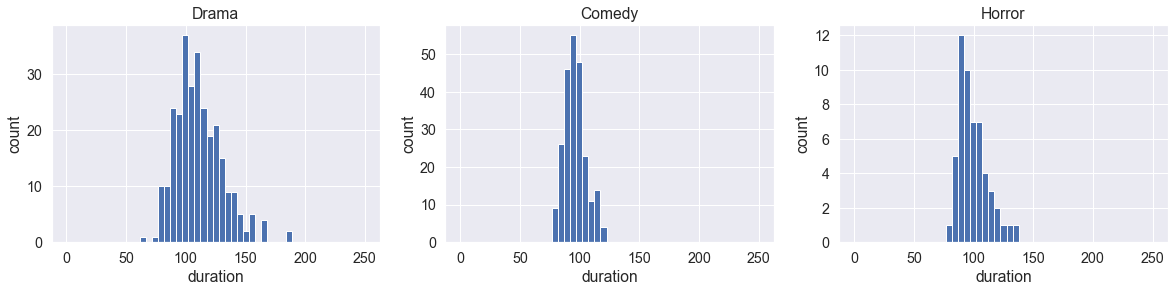

In [15]:
genre_list = ['Drama', 'Comedy', 'Horror']

genre = genre_list[0]

# sizing the figure
bins = np.linspace(0, 250, 50)
plt.figure(figsize=(20, 4))

for genre_idx, genre in enumerate(genre_list):
    
    # indexing genres
    s_bool = df_movies['genre'] == genre
    df_movies_genre = df_movies.loc[s_bool, :]
    
    # activate proper subplot
    plt.subplot(1, 3, genre_idx + 1)
    
    # plot histogram
    plt.hist(df_movies_genre['duration'] / , bins=bins)
    
    # label axes
    plt.xlabel('duration')
    plt.ylabel('count')
    
   #  plt.ylim(0, 0.05)
    
    # title of histograms
    plt.gca().title.set_text(genre_list[genre_idx]) 

## Part 3.2: Does budget predict movie ratings? (15 points)

Does a bigger budget movie tend to get higher viewer scores?  

Build [this scatter plot](https://ibb.co/pwZ4NQg) of `Budget` and `avg_vote` for movies whose genre is either `Drama` or `Comedy`.

Be sure to:
- plot each genre with a unique color
- add a legend per genre
- labels axes and gives title to plot
- uses `alpha` to ensure all dots are visible
- use a logarithmic scale where appropriate

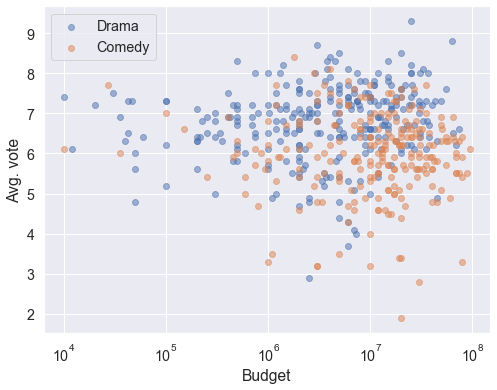

In [10]:
genre_list = ['Drama', 'Comedy']

for genre in genre_list:
    # boolean index: only rows with given start station
    bool_genre = df_movies['genre'] == genre
    df_movies_genre = df_movies.loc[bool_genre, :]

    # scatter
    plt.scatter(df_movies_genre['budget'],
                df_movies_genre['avg_vote'], alpha=.5, label=genre)
    
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Avg. vote')
plt.xscale('log')
plt.gcf().set_size_inches(8, 6)

## Part 3.3 Interpretting scatterplots (6 points)
In the plot above, `avg vote` is the average viewer vote of how good the movie was (higher values indicate the viewer enjoyed the movie more).

Based on the plot, answer the following questions (and explain how you read that from the plot).
1. Which of the two genres appear to get larger scores from the users?
1. Which of the two genres appear to have larger budgets?
1. Discuss whether larger budgets result in better reception by the viewers in either genre:
    - Does spending more money on a movie always increase user voting?
    - Does spending more money on a movie have little to no impact on viewer voting?
    - Does spending more money on a movie always decrease user voting?

In [11]:
# My answer: 

Question 1
- Drama gets larger scores from users.
- More of the points for Drama have higher avg. votes.

Question 2
- Comedy has larger budgets.
- More points for Comedy are towards the right (higher budget).

Question 3
- No, you can have a low budget movie with a higher viewer voting.
- No, you can have a high budget movie with a higher viewer voting.
- No, you can have a high budget movie with a higher viewer voting.

## Part 3.4: Are movies getting more expensive and worse over time? (10 + 2 points)

According to [this plot you'll build](https://ibb.co/pj3mWYF) ... yes.

**BONUS**: Use `plt.fill_between()` to [show](https://ibb.co/vQKyhbq) where the middle-most 50% of the data lies in your plot (hint: pass `alpha` to this function so it doesn't occlude other graph elements ... you may find that `.describe()`-ing your data is helpful to get the middle 50%).

<Figure size 720x360 with 0 Axes>

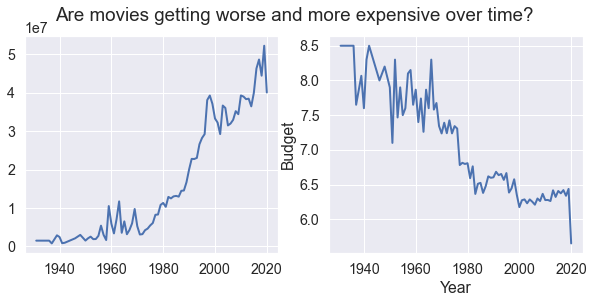

<Figure size 720x360 with 0 Axes>

In [12]:
mean_budget = df_movies[['year', 'budget']].groupby('year').mean()
avg_vote = df_movies[['year', 'avg_vote']].groupby('year').mean()


fig, (plot1, plot2) = plt.subplots(1, 2)
fig.suptitle('Are movies getting worse and more expensive over time?')

plot1.plot(mean_budget, color='b', linewidth=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('avg_vote')


plot2.plot(avg_vote, color='b', linewidth=2, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.gcf().set_size_inches(10, 4)
plt.figure(figsize=(10, 5))


## Part 3.5 (5 points)
Using the [graph built above](https://ibb.co/pj3mWYF), answer the following questions:
1. Roughly, how many times more expensive is an average movie made in 2019 compared to an average movie from 1980?
    - assume that budgets have been adjusted for inflation so no steps need to be taken to compare a dollar from 1980 to a dollar from 2019
1. Average scores appear to fall over time. One explanation is that nowadays average movies are simply worse than they used to be. Think of at least two other distinct reasons why this may be the case (reasons must be plausible though no justification is needed).

In [13]:
# My answer:

Question 1
- about 5 times

Question 2
- one reason could be that less people are watching these movies
- another reason is that plotlines have been reused and recycled making them unoriginal